# Importing Libraries

In [1]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from fpdf.enums import XPos, YPos
from nltk.tokenize import word_tokenize, sent_tokenize


## Comments
* I was not able to download spaCy for some reason so I will work my way around - fixed

# Input Handling

In [2]:
def read_text_file(file_path):
    """
    Reads the content of a .txt file.
    
    :parameter file_path: Path to the text file.
    :return: The content of the file as a string or None if an error occurs.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        return text
    except FileNotFoundError:
        print("File not found! Please provide a valid file path.")
        return None

file_path = '4_Input_Sample_Text_Mercedes_Benz.txt'
content = read_text_file(file_path)

if content is not None:
    print(content)


No problem! here's the fill information about the Mercedes CLR GTR:

The Mercedes CLR GTR is a remarkable racing car celebrated for its outstanding performance and sleek design. Powered by a potent 6.0 V12 engine, it delivers over 600 horsepower.

Acceleration from 0 to 100km/h takes approximately 3.7 seconds, with a remarkable top speed surpassing 330km/h.



# Text Analysis

In [3]:
def analyze_text(text):
    """
    Analyzes the given text and returns statistics.
    
    :parameter text: The text to analyze.
    :return: A dictionary with word, sentence, paragraph, character counts with and without spaces and average word length.
    """
    # Normalize whitespace and split the text by spaces
    words = text.split()
    sentences = sent_tokenize(text)
    paragraphs = text.split("\n\n")
    
    total_characters = len(text)
    total_characters_no_spaces = len(text.replace(" ", ""))
    total_words = len([word for word in words if word])  # Count non-empty words
    avg_word_length = total_characters_no_spaces / total_words if total_words > 0 else 0
    
    analysis_result = {
        'word_count': total_words,
        'sentence_count': len(sentences),
        'paragraph_count': len(paragraphs),
        'character_count': total_characters,
        'character_count_no_spaces': total_characters_no_spaces,
        'average_word_length': avg_word_length
    }
    
    return analysis_result

if content is not None:
    analysis_result = analyze_text(content)  # Analyze the content
    print(analysis_result)  # Print the analysis result

    

{'word_count': 56, 'sentence_count': 4, 'paragraph_count': 3, 'character_count': 360, 'character_count_no_spaces': 307, 'average_word_length': 5.482142857142857}


## Comments
* Word count was 5, edited a lot so it is now 4 and thus correct - fixed
* Average word length is rounded off weirdly - fixed

# Visualization

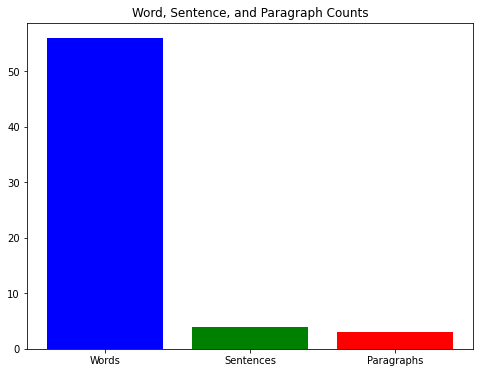

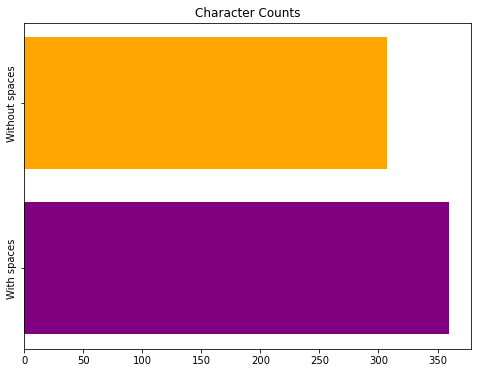

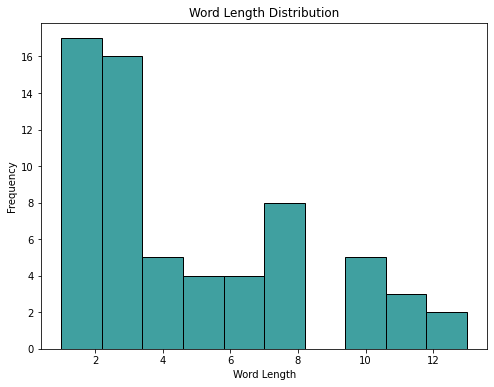

In [4]:
def generate_visualizations(analysis_result, content):
    """
    Generates and displays the required visualizations based on the analysis.
    
    :parameter analysis: The text analysis dictionary.
    :parameter text: The original text for word length distribution.
    """
    # Bar chart for word, sentence, and paragraph counts
    plt.figure(figsize=(8, 6))
    plt.bar(['Words', 'Sentences', 'Paragraphs'], 
            [analysis_result['word_count'], analysis_result['sentence_count'], analysis_result['paragraph_count']],
            color=['blue', 'green', 'red'])
    plt.title('Word, Sentence, and Paragraph Counts')
    plt.savefig('7_output_counts_chart.png')
    plt.show()

    # Horizontal bar chart for character counts
    plt.figure(figsize=(8, 6))
    plt.barh(['With spaces', 'Without spaces'], 
         [analysis_result['character_count'], analysis_result['character_count_no_spaces']], 
         color=['purple', 'orange'])
    plt.yticks(rotation=90, va='center') # Set y-axis labels vertically and centered
    plt.title('Character Counts')
    plt.savefig('8_output_character_chart.png')
    plt.show()

    # Histogram of word length distribution
    word_lengths = [len(word) for word in word_tokenize(content)]
    plt.figure(figsize=(8, 6))
    sns.histplot(word_lengths, kde=False, bins=10, color='teal')
    plt.title('Word Length Distribution')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.savefig('9_output_word_length_histogram.png')
    plt.show()

generate_visualizations(analysis_result, content)


## Comments
* Remember to add plt.savefig('title.png') later - fixed
* Images are not saved for some reason - fixed

# PDF Generation

In [5]:
class PDFReport(FPDF):
    def header(self):
        self.set_font('Helvetica', 'B', 12)
        self.cell(0, 10, 'Text Analysis Report', 0, new_x=XPos.LMARGIN, new_y=YPos.NEXT, align='C')
        
    def add_input_text(self, input_text):
        """
        Adds the input text to the PDF.
        
        :parameter input_text: The text that was analyzed.
        """
        self.set_font('Helvetica', '', 12)  # Regular font for the input text
        self.ln(10)  # Space before the text
        self.multi_cell(0, 10, f"{input_text}", align='L')  # Wrap text

    def add_analysis_summary(self, analysis):
        self.set_font('Helvetica', 'B', 12)
        self.ln(10)
        self.cell(0, 10, f"Word Count: {analysis['word_count']}", 0, new_x=XPos.LMARGIN, new_y=YPos.NEXT)
        self.cell(0, 10, f"Sentence Count: {analysis['sentence_count']}", 0, new_x=XPos.LMARGIN, new_y=YPos.NEXT)
        self.cell(0, 10, f"Paragraph Count: {analysis['paragraph_count']}", 0, new_x=XPos.LMARGIN, new_y=YPos.NEXT)
        self.cell(0, 10, f"Character Count (with spaces): {analysis['character_count']}", 0, new_x=XPos.LMARGIN, new_y=YPos.NEXT)
        self.cell(0, 10, f"Character Count (without spaces): {analysis['character_count_no_spaces']}", 0, new_x=XPos.LMARGIN, new_y=YPos.NEXT)
        self.cell(0, 10, f"Average Word Length: {analysis['average_word_length']:.2f}", 0, new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    def add_image(self, image_path, img_width=160):
        # Calculate x-position to center the image
        page_width = self.w  # Total page width
        x_position = (page_width - img_width) / 2  # Centered position
        # Insert the image
        self.ln(10)
        self.image(image_path, x=x_position, w=img_width)

def generate_pdf_report(analysis, input_text):
    """
    Generates a PDF report of the text analysis.
    
    :parameter analysis: The text analysis dictionary.
    :parameter input_text: The original text that was analyzed.
    """
    pdf = PDFReport()
    pdf.add_page()
    
    # Add input text at the beginning
    pdf.add_input_text(input_text)

    # Add summary
    pdf.add_analysis_summary(analysis)

    # Add images
    try:
        pdf.add_image('7_output_counts_chart.png')
        pdf.add_image('8_output_character_chart.png')
        pdf.add_image('9_output_word_length_histogram.png')
    except FileNotFoundError as e:
        print(f"Warning: {e} - One or more image files not found.")

    # Save PDF
    pdf.output('10_output_analysis_report.pdf')
    print("PDF report generated: '10_output_analysis_report.pdf'")

generate_pdf_report(analysis_result, content)


PDF report generated: '10_output_analysis_report.pdf'


## Comments
* Images are not saved - fixed
* Images are therefore not in the pdf doc - fixed
* All the analysis numbers are wrong - fixed
* Fix all errors in output - fixed
* Images in the pdf doc are cut off (the title on the y-axis of second image) - fixed
* I want to add the input text itself also in the pdf report in the beginning - fixed

## Testing docstrings

In [6]:
help(read_text_file)

Help on function read_text_file in module __main__:

read_text_file(file_path)
    Reads the content of a .txt file.
    
    :parameter file_path: Path to the text file.
    :return: The content of the file as a string or None if an error occurs.



In [7]:
help(analyze_text)

Help on function analyze_text in module __main__:

analyze_text(text)
    Analyzes the given text and returns statistics.
    
    :parameter text: The text to analyze.
    :return: A dictionary with word, sentence, paragraph, character counts with and without spaces and average word length.



In [8]:
help(generate_visualizations)

Help on function generate_visualizations in module __main__:

generate_visualizations(analysis_result, content)
    Generates and displays the required visualizations based on the analysis.
    
    :parameter analysis: The text analysis dictionary.
    :parameter text: The original text for word length distribution.



In [9]:
help(generate_pdf_report)

Help on function generate_pdf_report in module __main__:

generate_pdf_report(analysis, input_text)
    Generates a PDF report of the text analysis.
    
    :parameter analysis: The text analysis dictionary.
    :parameter input_text: The original text that was analyzed.

